### Loading Libraries

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the dataset

In [3]:
data=pd.read_csv('titanic.csv')
data.head() # To see the top 5 records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Summary

### Data Dictionary

<b>PassengerId</b> - Unique identifier for passenger<br>
<b>Survived</b> - Survival (0 = No; 1 = Yes)<br>
<b>Pclass</b> - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
<b>Name</b> - Name of the passenger<br>
<b>Sex</b> - Sex of the passenger<br>
<b>Age</b> - Age of the passenger<br>
<b>SibSp</b> - Number of Siblings/Spouses Aboard<br>
<b>Parch</b> - Number of Parents/Children Aboard<br>
<b>Ticket</b> - Ticket Number<br>
<b>Fare</b> - Passenger Fare<br>
<b>Cabin</b> - Cabin<br>
<b>Embarked</b> - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

### Type of variables 

- <b>**Nominal**:</b> Nominal variables are variables that have two or more categories, however these do not possess an intrinsic order. For example - a real estate agent could classify types of property into distinct categories such as houses, condos, co-ops or bungalows. Hence, "type of property" is a nominal variable with 4 categories - houses, condos, co-ops and bungalows. The different categories of a nominal variable are referred to as groups or levels of the nominal variable.


- <b>**Ordinal**:</b> An ordinal variable is similar to a nominal variable, with the difference being that ordinal variables have a relative order between them. For example - If a categorical variable Height has three values - Tall, Medium, and Short, with Tall > Medium > Short, then Height is an oridinal variable.
  
  
- <b>**Interval**:</b> Interval scale is a numeric scales in which both the order and the exact difference between values is known. In the case of an interval scale, zero does not mean the absence of value, but is actually another number used on the scale, for example 0 degrees celsius.


- <b>**Ratio:**</b> Ratio variables are interval variables with the added condition of an absolute zero measurement. For example - Temperature measured in degrees Celsius or Fahrenheit is not a ratio variable because 0 degree Celsius does not indicate an absence of temperature. Temperature measured in Kelvin is a ratio variable as 0 Kelvin (often called absolute zero) indicates that there is no temperature. Other examples of variables on a ratio scale are height, weight, age, etc.


### Variables and their data types

In [4]:
data.info() # Information of non null objects and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<b>Types of variables in the dataset</b>
1. Nominal variables: Name, Sex, Cabin, Embarked, Survived
2. Ordinal variables: PassengerID, PClass, Ticket, 
3. Interval variable: Nil
4. Ratio variable: Age, SibSp, Parch, Fare

### Descriptive Statistics of Numeric Variables

The number of observations, mean, standard deviation, minimum, maximum, and quartile (1st, median and 3rd) values are calculated for all the numeric variables

In [5]:
data.describe() # Summary Statistics of numeric variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for NULLs in data

In [6]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. How many people survived out of the all the passengers?

In [7]:
#data['Survived'].replace([1,0],['survived','perished'],inplace=True)

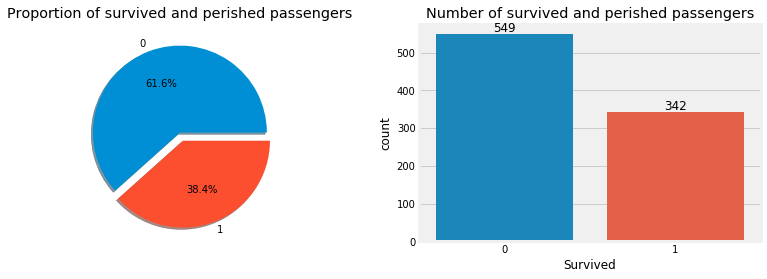

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,4))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Proportion of survived and perished passengers')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Number of survived and perished passengers')
plt.show()

### 2. Was a gender given preference while deboarding?

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [10]:
survived_palette = ['#A52A2A','#2E8B57']

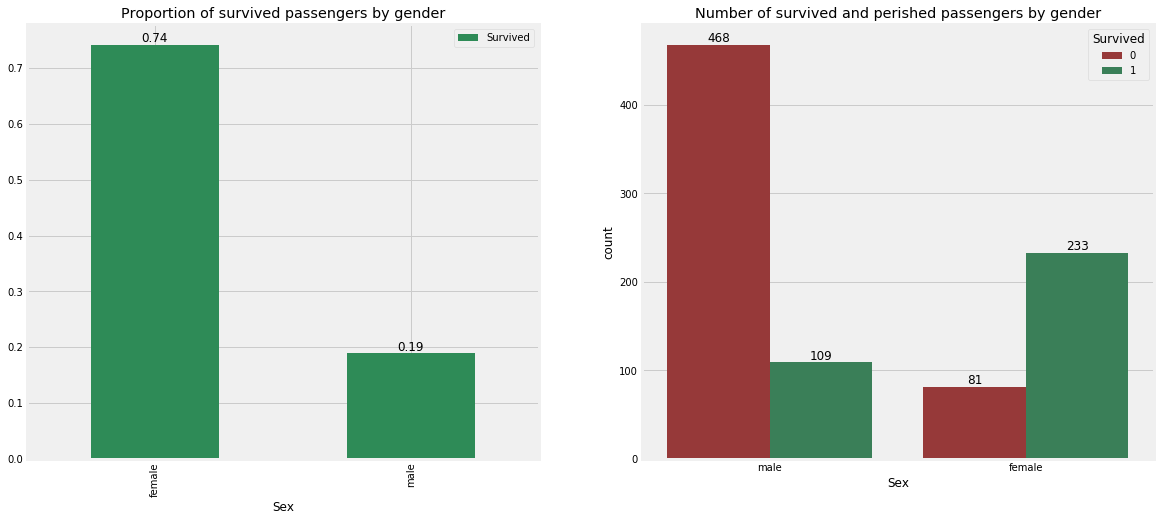

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0],color='#2E8B57')
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2.0, p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[0].set_title('Proportion of survived passengers by gender')
sns.countplot('Sex',hue='Survived',data=data,palette=sns.color_palette(survived_palette),ax=ax[1])
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Number of survived and perished passengers by gender')
plt.show()

### 3. Was any passenger class given preference?

In [12]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


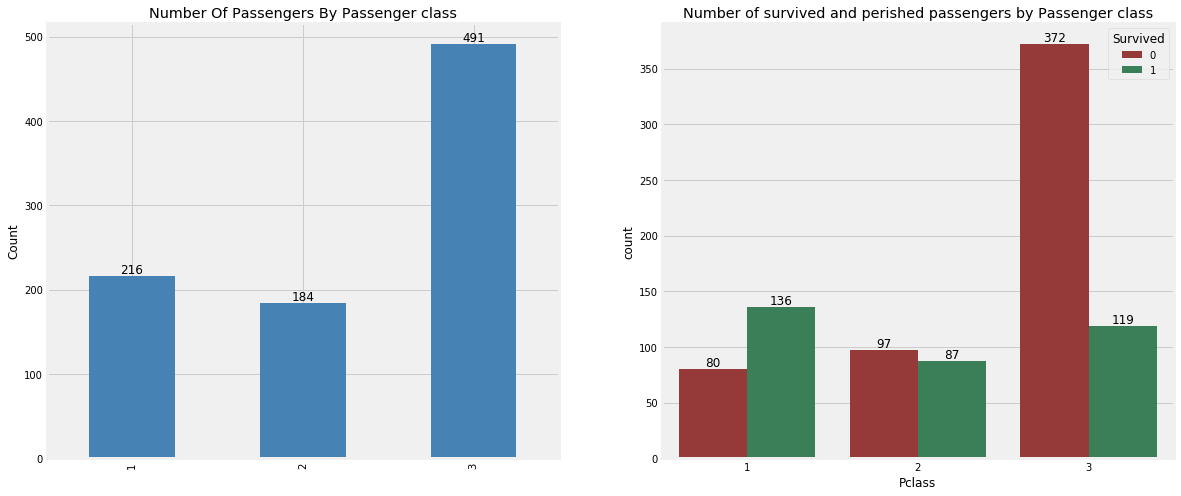

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().sort_index().plot.bar(color='#4682B4',ax=ax[0])
ax[0].set_title('Number Of Passengers By Passenger class')
ax[0].set_ylabel('Count')
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
sns.countplot('Pclass',hue='Survived',data=data,palette=sns.color_palette(survived_palette),ax=ax[1])
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Number of survived and perished passengers by Passenger class')
plt.show()

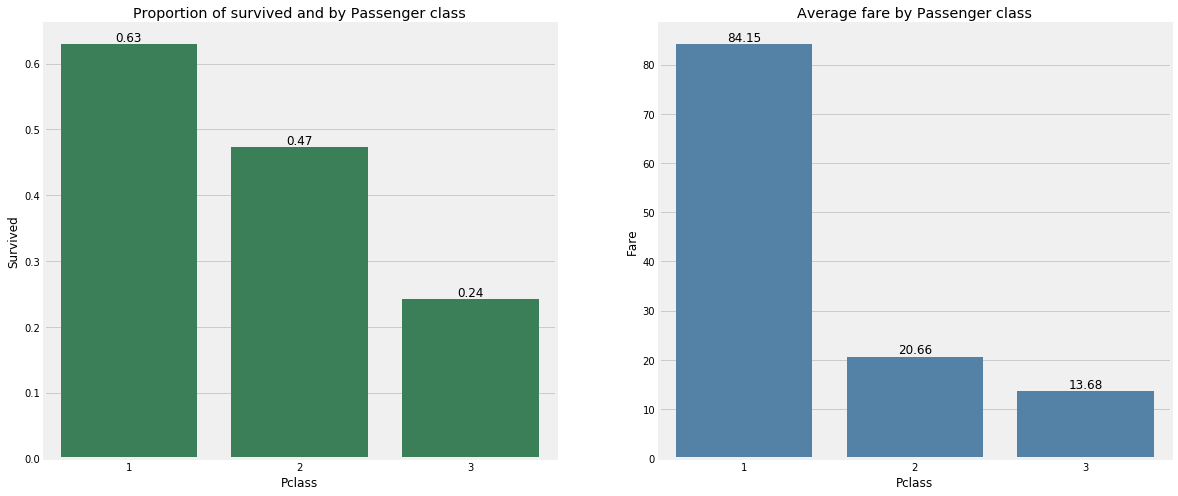

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.barplot('Pclass','Survived',color='#2E8B57',data=data,ci=None,ax = ax[0])
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[0].set_title('Proportion of survived and by Passenger class')    
sns.barplot('Pclass','Fare',color='#4682B4',data=data,ci=None,ax = ax[1])
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Average fare by Passenger class')    
plt.show()

### 4. Was a particular gender from a passenger class given preference? 

In [15]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

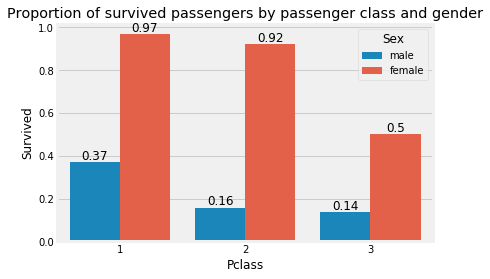

In [16]:
ax = sns.barplot('Pclass','Survived',hue ='Sex',data=data,ci=None)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Proportion of survived passengers by passenger class and gender')
plt.show()

## Analysis on variable - Age

Descriptive statistics of Age:

In [17]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',round(data['Age'].mean(),2),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


### Number of NULLs in Age

In [18]:
data.Age.isnull().sum()

177

## Missing value treatment

#### Extracting titles of passengers

In [19]:
data['Initial']=0 # Initilisation
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [20]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


#### Calculating the mean of passengers based on their titles

In [21]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Assigning the mean age to NULLs on the basis of initials

In [23]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

### 5. How does the age distribution of survived and perished passengers look like?

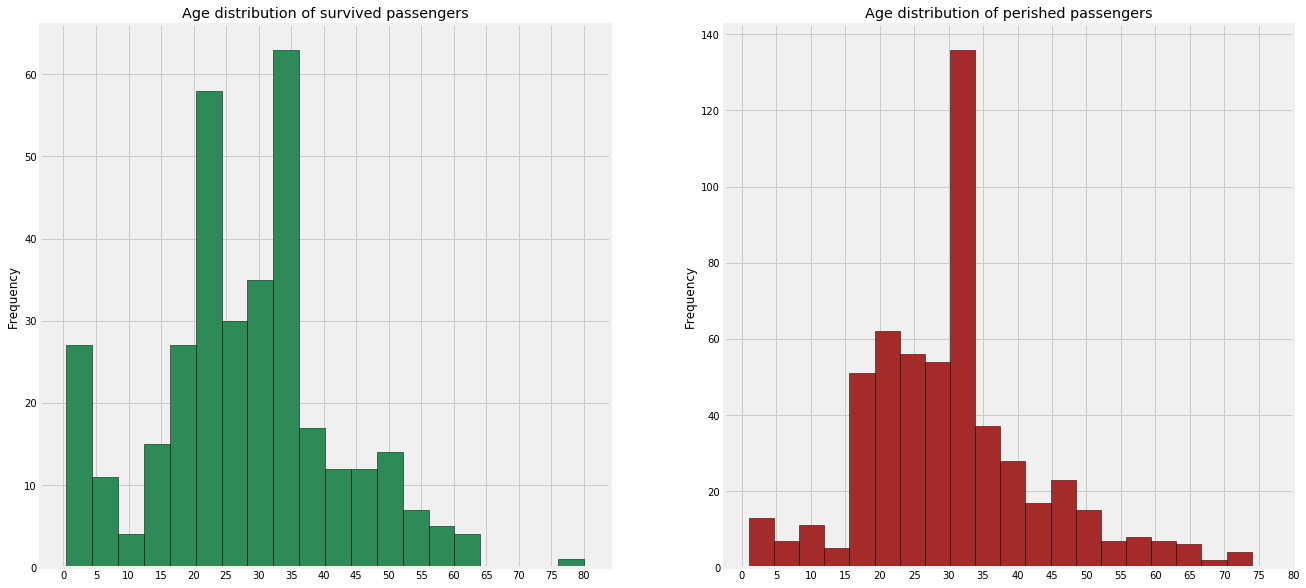

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==1].Age.plot.hist(ax=ax[0],color='#2E8B57',bins=20,edgecolor='black')
ax[0].set_title('Age distribution of survived passengers')
x2=list(range(0,85,5))
ax[0].set_xticks(x2)
data[data['Survived']==0].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='#A52A2A')
ax[1].set_title('Age distribution of perished passengers')
x1=list(range(0,85,5))
ax[1].set_xticks(x1)

plt.show()

### 6. How is age distributed for each PClass, for both survived and perished passengers?

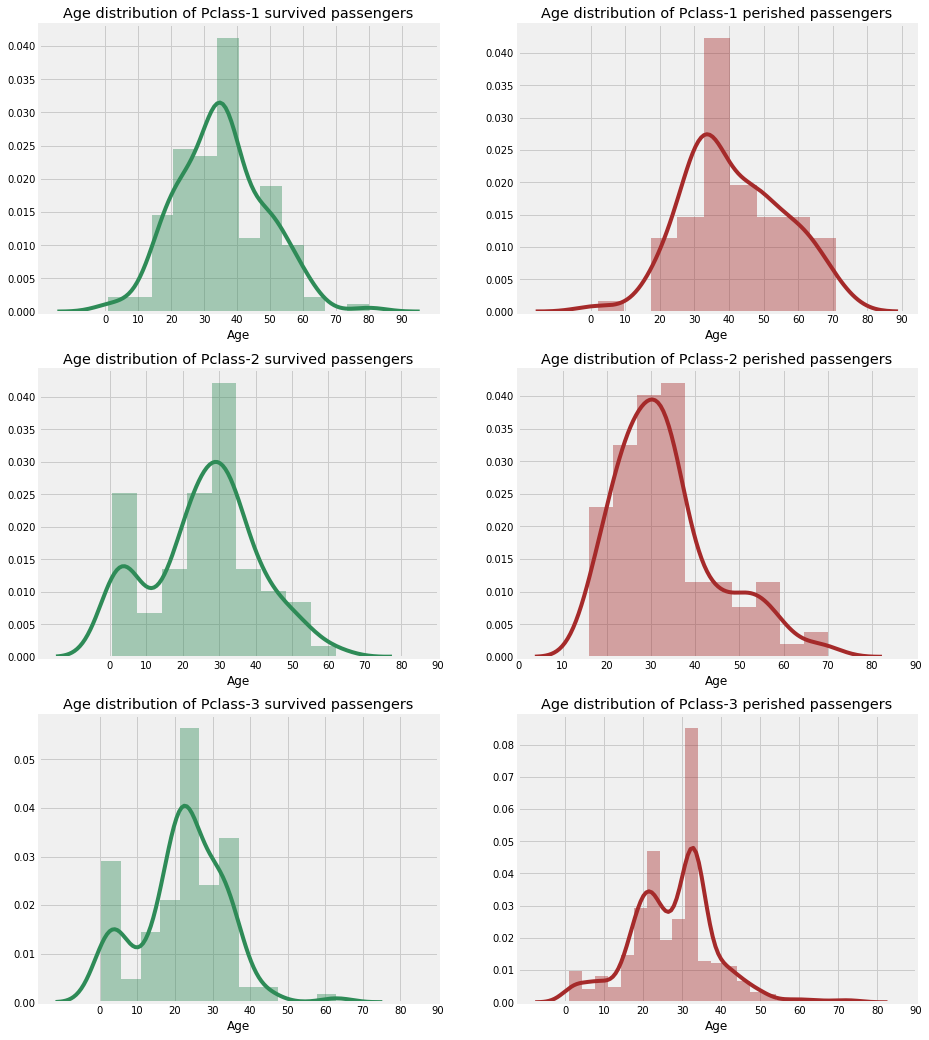

In [26]:
f,ax=plt.subplots(3,2,figsize=(14,18))
sns.distplot(data[data.Pclass == 1][data.Survived == 1]["Age"],ax=ax[0,0],color = '#2E8B57',)
ax[0,0].set_title('Age distribution of Pclass-1 survived passengers')
ax[0,0].set_xticks(range(0,100,10))
sns.distplot(data[data.Pclass == 1][data.Survived == 0]["Age"],ax=ax[0,1],color = '#A52A2A')
ax[0,1].set_title('Age distribution of Pclass-1 perished passengers')
ax[0,1].set_xticks(range(0,100,10))

sns.distplot(data[data.Pclass == 2][data.Survived == 1]["Age"],ax=ax[1,0],color = '#2E8B57')
ax[1,0].set_title('Age distribution of Pclass-2 survived passengers')
ax[1,0].set_xticks(range(0,100,10))
sns.distplot(data[data.Pclass == 2][data.Survived == 0]["Age"],ax=ax[1,1],color = '#A52A2A')
ax[1,1].set_title('Age distribution of Pclass-2 perished passengers')
ax[1,1].set_xticks(range(0,100,10))

sns.distplot(data[data.Pclass == 3][data.Survived == 1]["Age"],ax=ax[2,0],color = '#2E8B57')
ax[2,0].set_title('Age distribution of Pclass-3 survived passengers')
ax[2,0].set_xticks(range(0,100,10))
sns.distplot(data[data.Pclass == 3][data.Survived == 0]["Age"],ax=ax[2,1],color = '#A52A2A')
ax[2,1].set_title('Age distribution of Pclass-3 perished passengers')
ax[2,1].set_xticks(range(0,100,10))

plt.show()

### Binning

In [27]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


<b>Finding the number of passengers in each age band</b>

In [28]:
data['Age_band'].value_counts().sort_index().to_frame().style.background_gradient(cmap='summer_r') #checking the number of passenegers in each band

,Age_band
0,104
1,382
2,325
3,69
4,11


### 7. How does the surivival rate look like for various age groups and passenger classes?

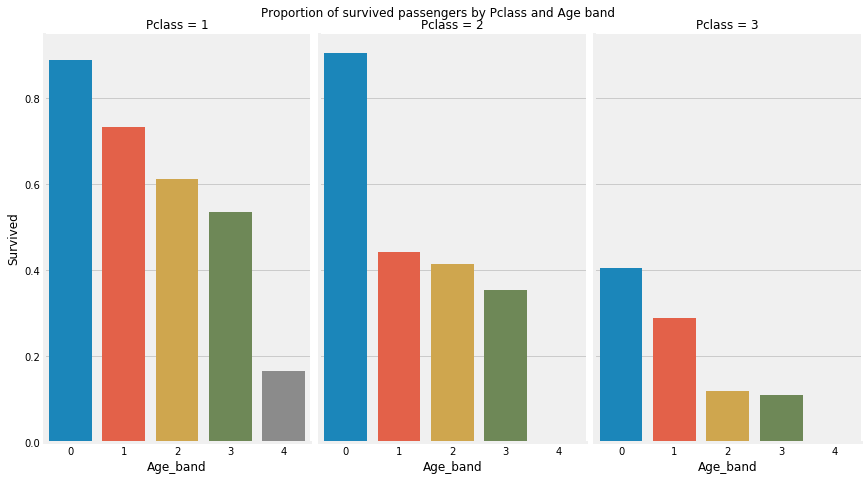

In [29]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass',kind = 'bar',ci=None)
plt.gcf().set_size_inches(12, 7)
plt.suptitle('Proportion of survived passengers by Pclass and Age band')
plt.show()

Observations:
1. Higher the Age band, lesser is the survival rate (across all passenger classes)
2. Age band '0' (passengers under 16 years of age) has the highest survival rate (across all passenger classes)

### 8. How does the surivival rate look like for various age groups (based on title) and passenger classes?

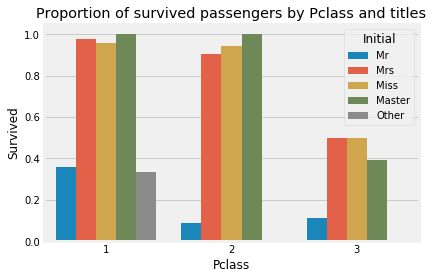

In [30]:
ax = sns.barplot('Pclass','Survived',hue= 'Initial',data=data,ci=None)
plt.title('Proportion of survived passengers by Pclass and titles')
plt.show()

## Analysis on variable - Embarked (port of embarkation)

### 9. Does the port of embarkation impact the chances of survival?

In [31]:
# Renaming the original codes with the exact names
data['Embarked'].replace(['S','C','Q'],['Southampton','Cherbourg','Queenstown'],inplace=True)

In [32]:
data['Embarked'].fillna('Southampton',inplace=True)

In [33]:
data.Embarked.isnull().any()# Finally No NaN values

False

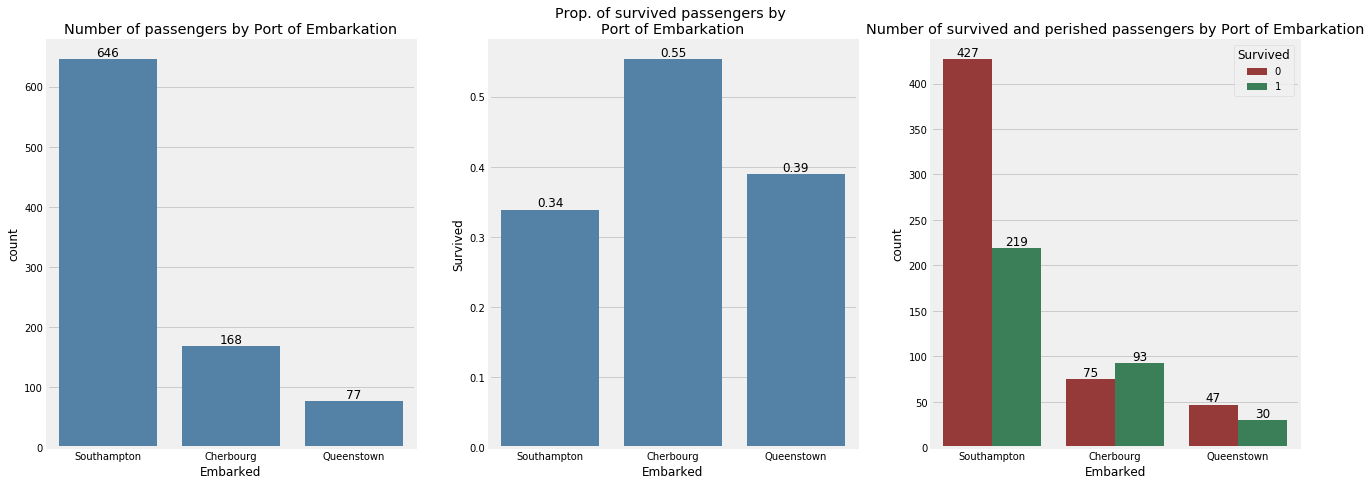

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,7.5))
sns.countplot('Embarked',data=data,ax=ax[0],color = '#4682B4')
ax[0].set_title('Number of passengers by Port of Embarkation')
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
sns.factorplot('Embarked','Survived',data=data,ax=ax[1],kind = 'bar',ci=None,color = '#4682B4')
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Prop. of survived passengers by \nPort of Embarkation')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[2],palette=sns.color_palette(survived_palette))
for p in ax[2].patches:
    ax[2].text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[2].set_title('Number of survived and perished passengers by Port of Embarkation')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.close(2)
plt.show()

### 10. Are there any survival rate patterns for gender and port of embarkation?

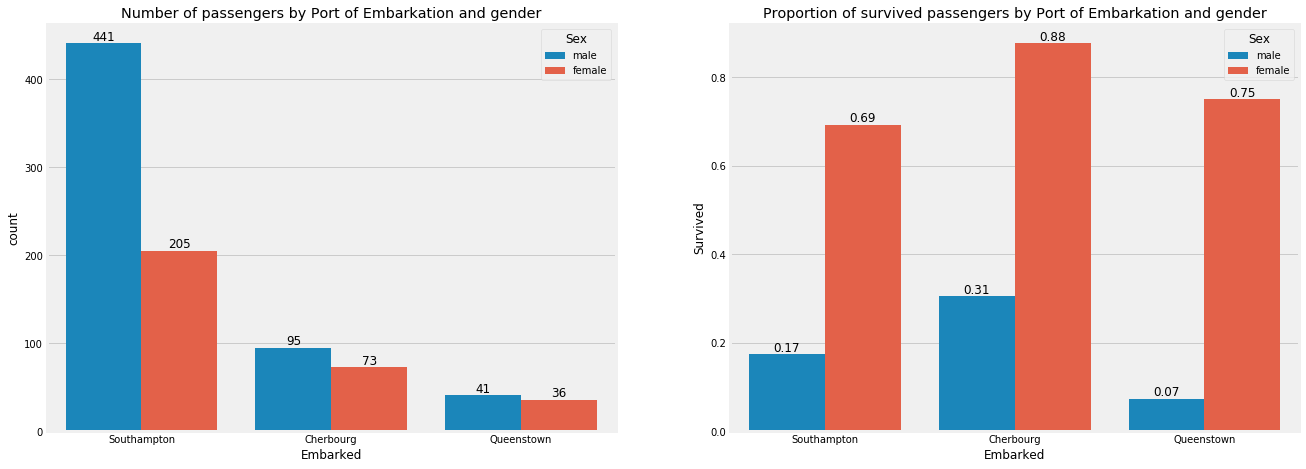

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,7.5))
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0])
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[0].set_title('Number of passengers by Port of Embarkation and gender')
sns.factorplot('Embarked','Survived',hue = 'Sex',data=data,ax=ax[1],kind = 'bar',ci=None)
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Proportion of survived passengers by Port of Embarkation and gender')
plt.close(2)
plt.show()

### 11. Are there any survival rate patterns for passenger class and port of embarkation?

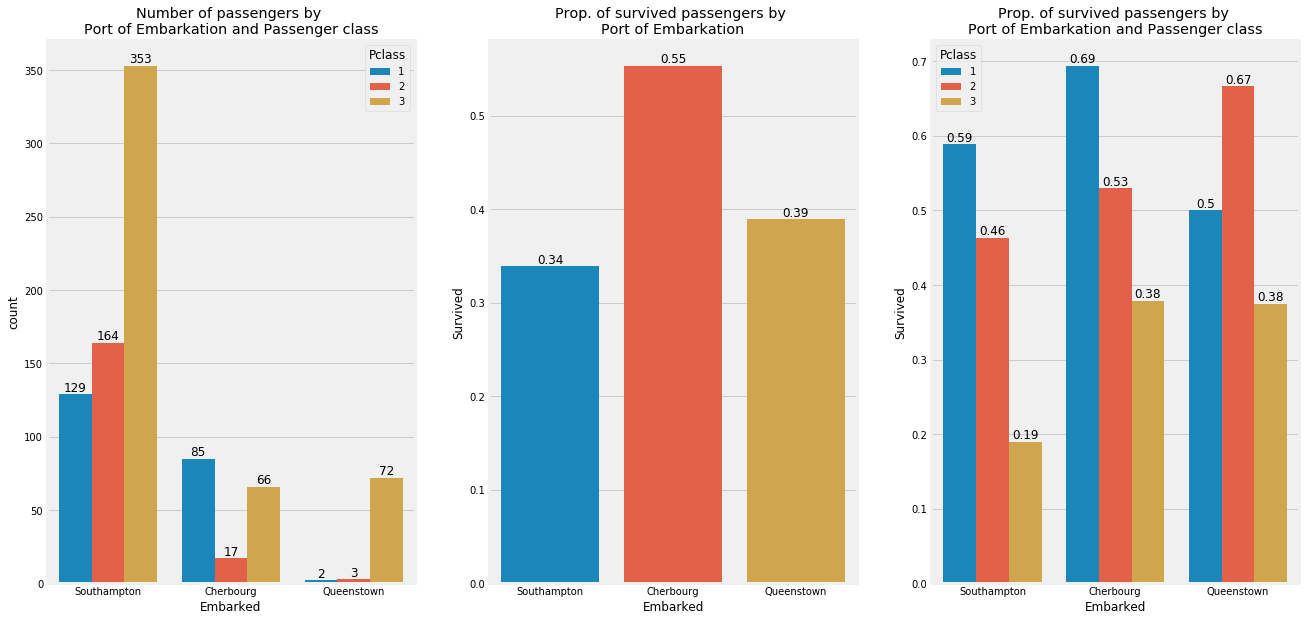

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[0])
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[0].set_title('Number of passengers by \nPort of Embarkation and Passenger class')

sns.factorplot('Embarked','Survived',data=data,ax=ax[1],kind = 'bar',ci=None)
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Prop. of survived passengers by \nPort of Embarkation')

sns.factorplot('Embarked','Survived',hue = 'Pclass',data=data,ax=ax[2],kind = 'bar',ci=None)
for p in ax[2].patches:
    ax[2].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[2].set_title('Prop. of survived passengers by \nPort of Embarkation and Passenger class')

plt.close(2)
plt.close(3)
plt.show()

In [37]:
# Creating a crosstab of Embarked, sex, Pclass and Survived columns
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 12. What is the survival rate across a combination of passenger class, gender and port of embarkation?

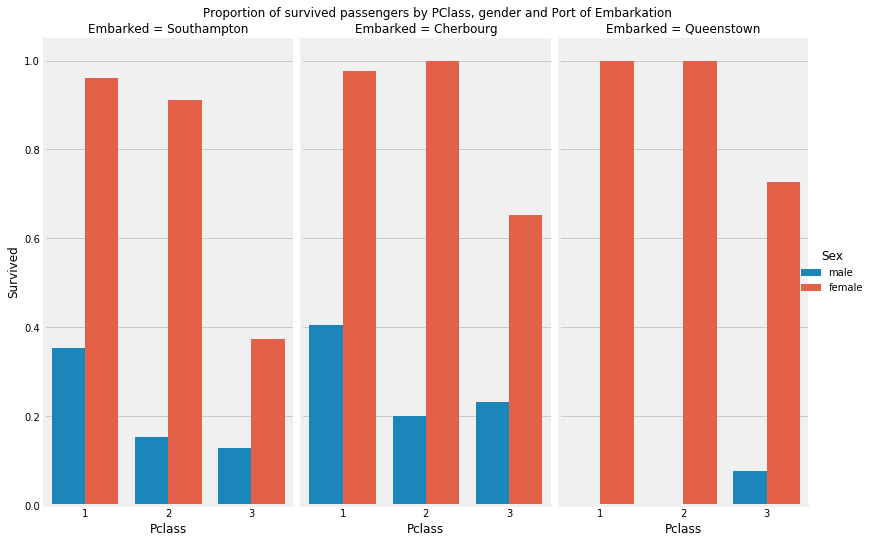

In [38]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col='Embarked',data=data,kind = 'bar',ci=None)
plt.gcf().set_size_inches(12, 8)
plt.suptitle('Proportion of survived passengers by PClass, gender and Port of Embarkation')
plt.show()

### Analysis on variable - SibSp (Number of Siblings / Spouse)

### 13. How is the survival rate for a passenger if he/she was travelling with a large number of siblings?

In [39]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


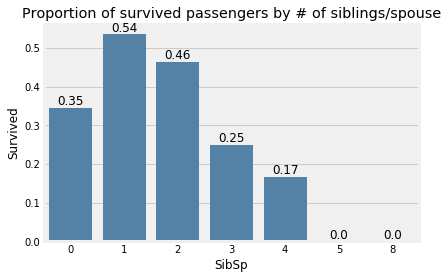

In [40]:
ax = sns.barplot('SibSp','Survived',data=data,ci=None,color = '#4682B4')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_title('Proportion of survived passengers by # of siblings/spouse')
plt.show()

### 14. How does the distribution of Siblings/Spouse look across PClass?

In [41]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Analysis on variable -  Parch (Number of Parents/Children)

### 15. How does the survival rate of a passenger vary with an increase in the number of Parents/Children?

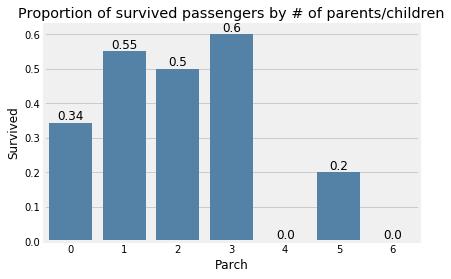

In [42]:
ax = sns.barplot('Parch','Survived',data=data,ci=None,color = '#4682B4')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_title('Proportion of survived passengers by # of parents/children')
plt.show()

### 16. How does the distribution of Parents/Children look like across PClass?

In [43]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


## Creating New Variables 

Creating a new variable <b>Family_Size</b> which will calculate the total family members for further analysis

### 17. How does the survival rate vary as family size increases?

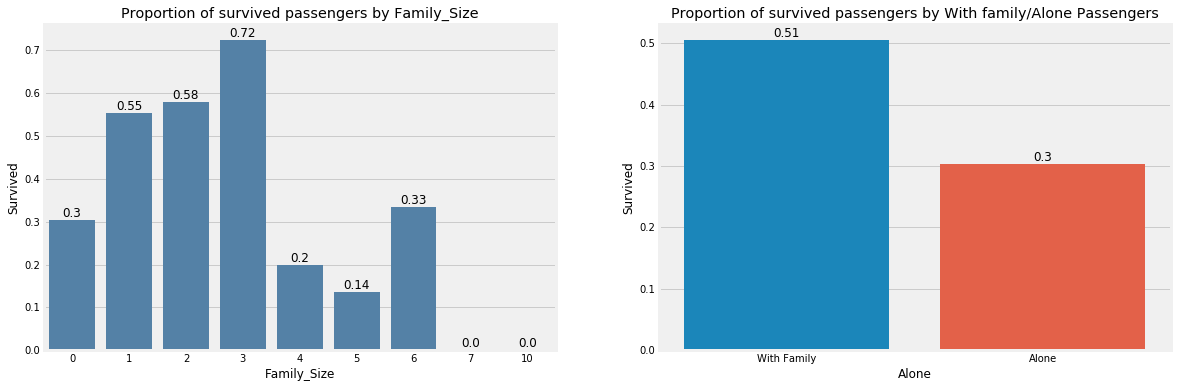

In [44]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']='With Family'
data.loc[data.Family_Size==0,'Alone']='Alone'#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0],kind = 'bar',ci=None,color = '#4682B4')
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[0].set_title('Proportion of survived passengers by Family_Size')
sns.factorplot('Alone','Survived',data=data,ax=ax[1],kind = 'bar',ci=None)
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
ax[1].set_title('Proportion of survived passengers by With family/Alone Passengers')
plt.close(2)
plt.close(3)
plt.show()

### 18. How is the survival rate for a passenger across gender, PClass and family flag (With family / Alone)?

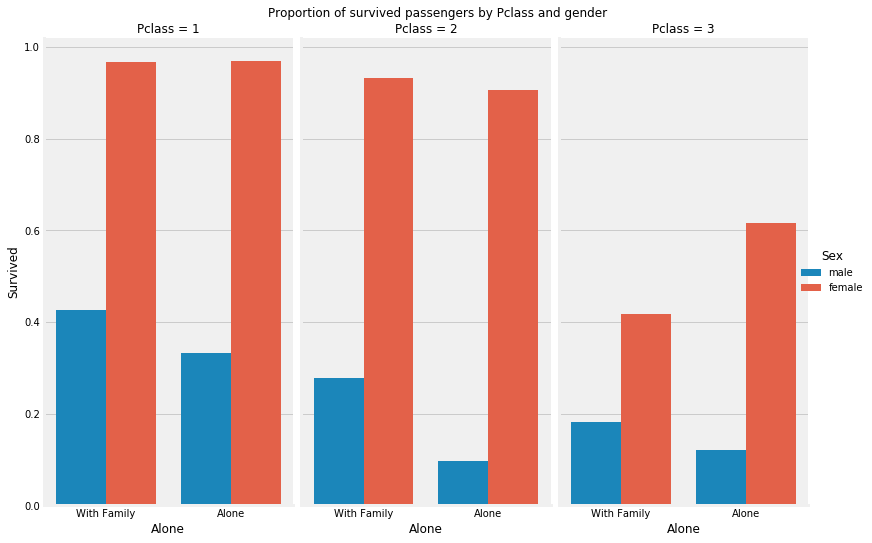

In [45]:
ax = sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass',kind = 'bar',ci=None)
plt.gcf().set_size_inches(12, 8)
plt.suptitle('Proportion of survived passengers by Pclass and gender')
plt.show()

### 19. How was the fare distribution?

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


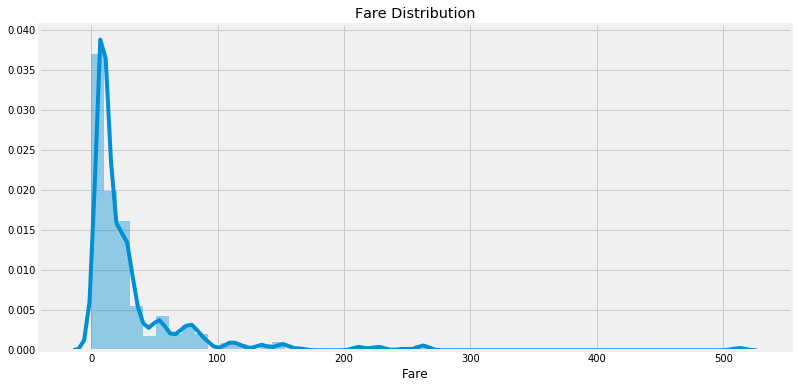

In [46]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())
sns.distplot(data.Fare)
plt.gcf().set_size_inches(12, 6)
plt.title('Fare Distribution')
plt.show()

### 20. How was fare distributed across various passenger classes?

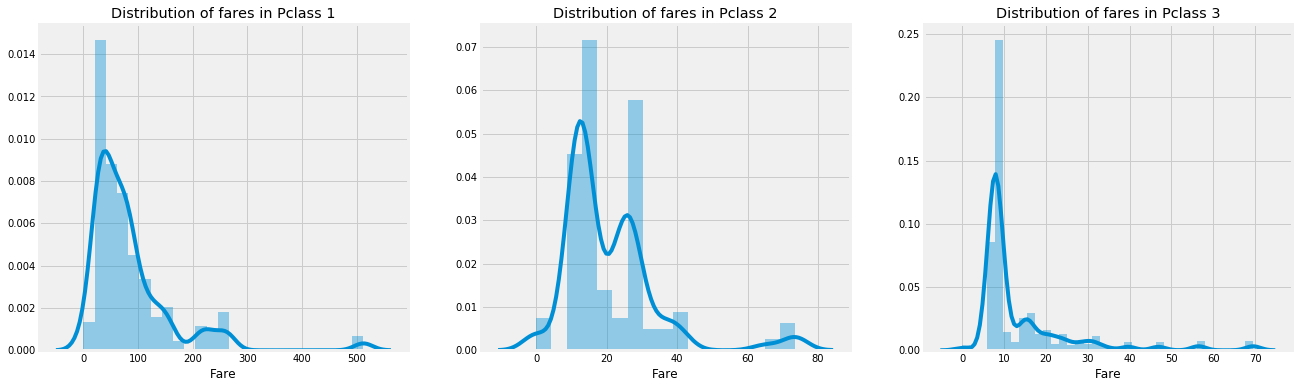

In [47]:
f,ax=plt.subplots(1,3,figsize=(20,6))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Distribution of fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Distribution of fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Distribution of fares in Pclass 3')
plt.show()

### 21. How does the survival rate look like across fare categories?

In [48]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [49]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

### 22. How does the survival rate look like across fare category and gender?

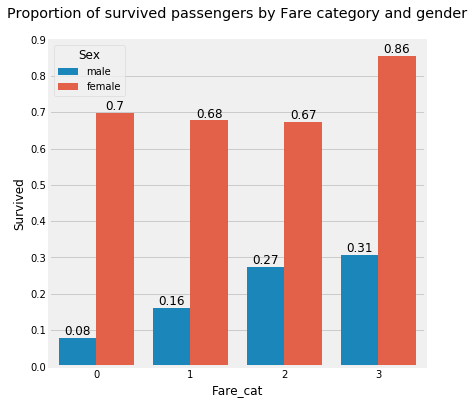

In [50]:
f,ax=plt.subplots(1,1,figsize=(6,6))
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex',kind = 'bar',ci=None,ax = ax)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), round(p.get_height(),2), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.close(2)
plt.title('Proportion of survived passengers by Fare category and gender\n')
plt.show()

### Correlation Plot

In [51]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['Southampton','Cherbourg','Queenstown'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

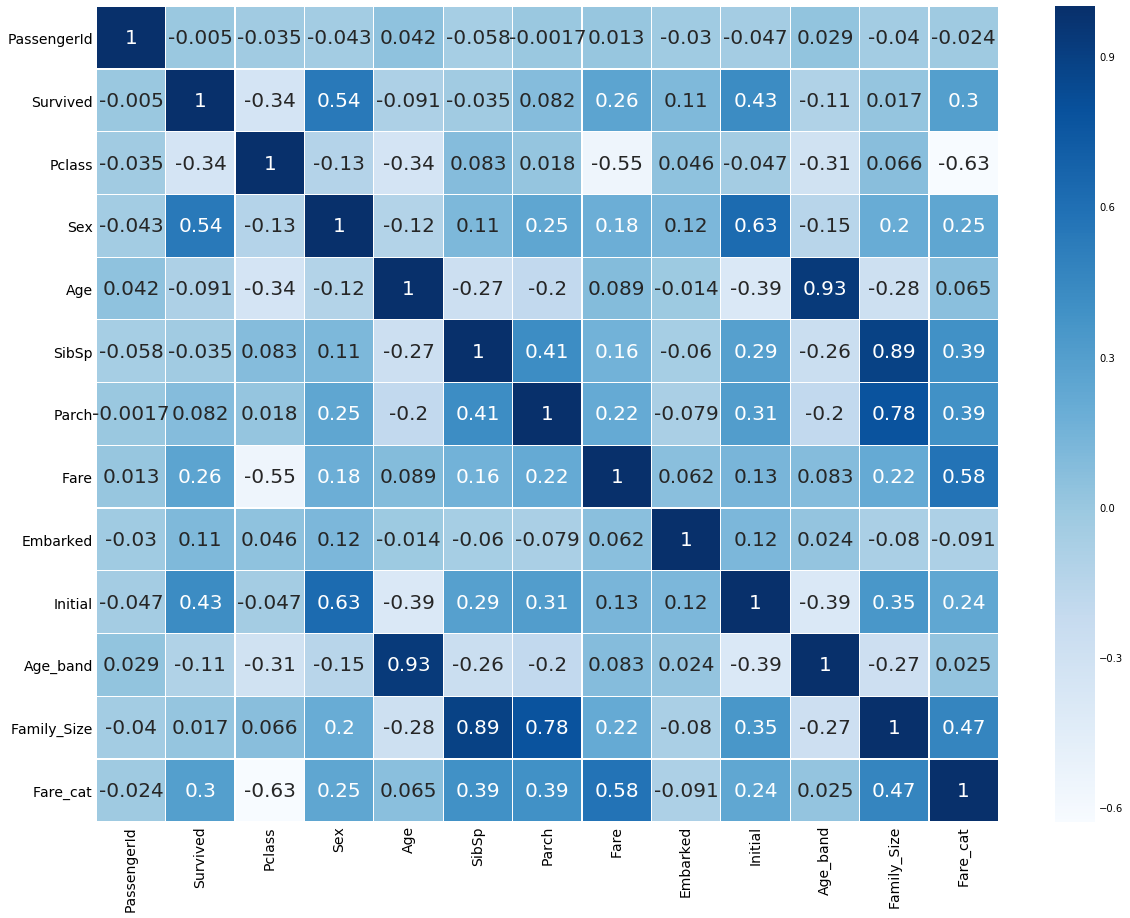

In [52]:
#data.drop(['Name','Ticket','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Recreating the Correlation Matrix after removing highly correlated (both positive and negative) variables

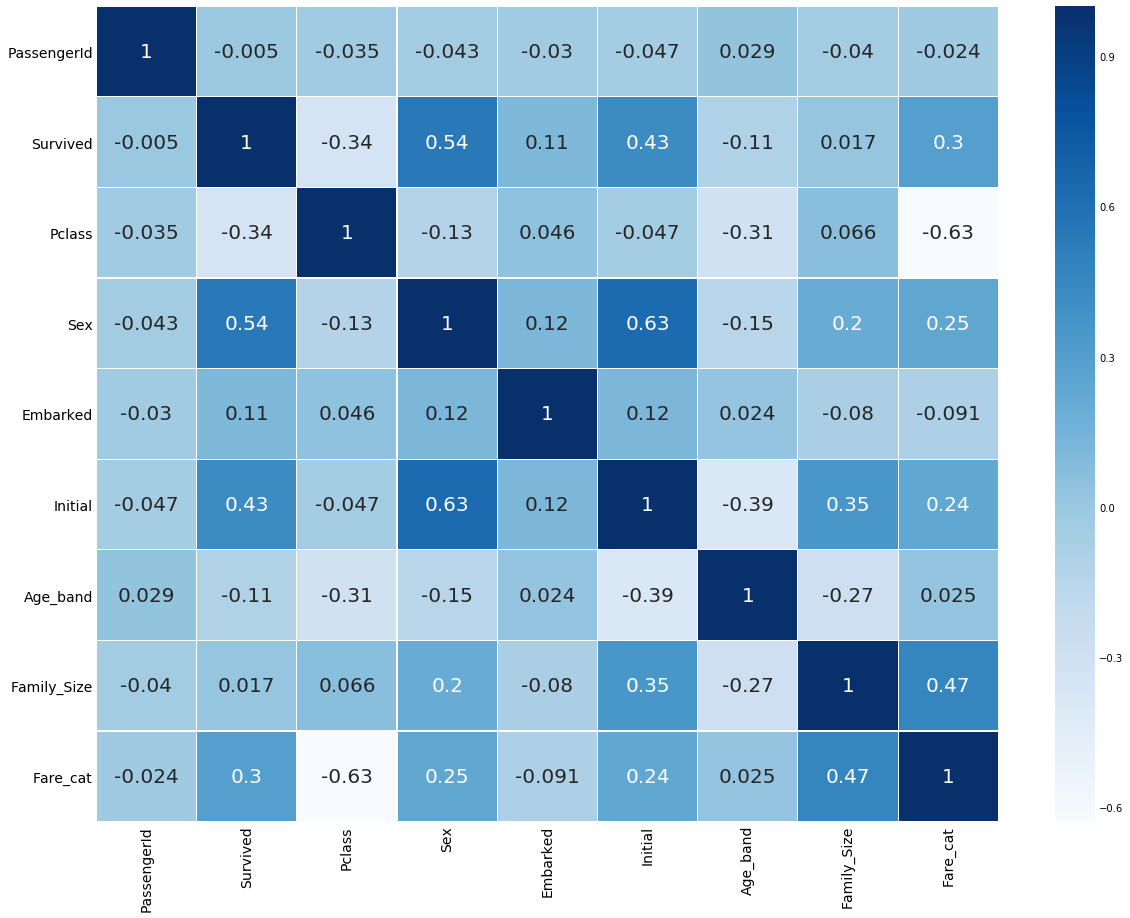

In [53]:
data.drop(['SibSp','Parch','Age','Fare'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Conclusion & Summary

Summarizing the insights gathered from the overall exploratory data analysis:
1. Overall, women have a higher chance of survival compared to men
2. There is a visible trend that passengers travelling in 1st class have a better chance of survival
3. The survival rate for third class passengers is very low
4. Women travelling in 1st class have an almost sure (100%) chance of survival
5. Women travelling in the 2nd class also have a high chance of survival
6. Children younger than 5 years of age had a higher chance of survival
7. Majority of the passengers who perished belonged to the age group 15-35
8. Passengers who boarded the ship at Cherbourg had a higher chance of survival
9. Passengers who were travelling with 1-2 siblings, or with their spouse, or with 1-3 parents/children had greater chances of survival compared to passengers who were travelling alone or were part of a large family